In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_spec import create_spec
from fit2gauss import fit2gauss

In [3]:
# import arrays
# s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/avg_spec.txt', dtype=int)
# e = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/avg_error.txt', dtype=int)

s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f1_h20.txt', dtype=int)
e = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f1_h20_err.txt', dtype=int)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [4]:
# wavelengths
line = 1403.
wav = np.arange(line-10,line+10,0.01)

In [9]:
spec = s[7,:]
error = e[7,:]
res = fit2gauss(wav,spec,error,verbose=True)

est params =  [25953.989356859147, 1403.8166753811302, 0.1, 301146.13496835646, 1403.3432308858391, 0.1]
single peak found
iss = [0]
only one peak still
new init params =  [364706.00000000006, 1403.3999999999905, 0.1, 182353.00000000003, 1403.1499999999905, 0.1]
a2g = [3.62944875e+05 1.40340214e+03 1.05681792e-01 2.96099930e+04
 1.40314617e+03 1.18542094e-01]
a1g[0] = 360578.6263952339
chi2g =  nan
a2g =  [3.62944875e+05 1.40340214e+03 1.05681792e-01 2.96099930e+04
 1.40314617e+03 1.18542094e-01]
chi1g =  nan
chi2g =  nan


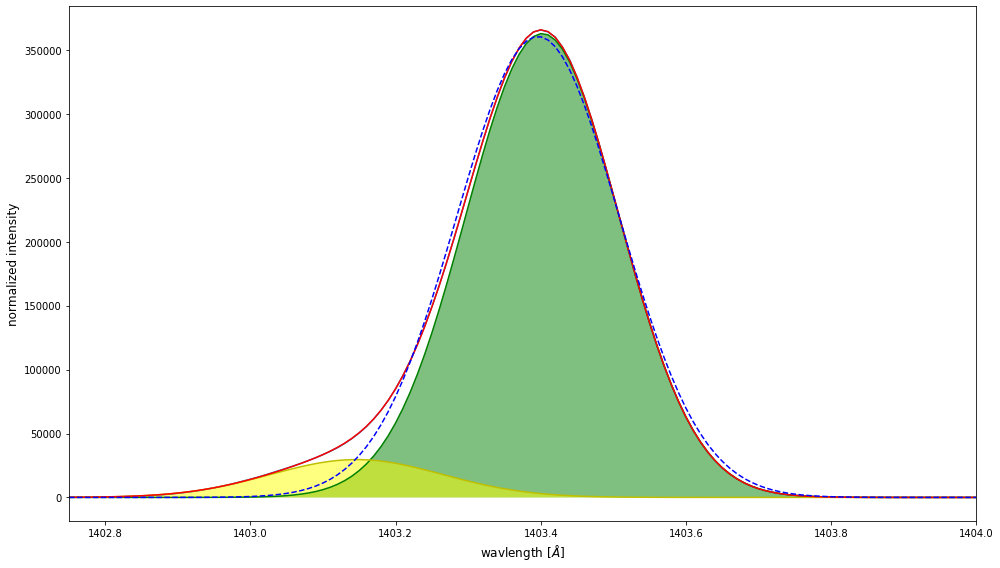

In [10]:
# extract arrays
y2a = res["y2a"]
y2b = res["y2b"]
y1g = res["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec)

# peak 1
ax1.plot(wav, y2a, "g")
ax1.fill_between(wav, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wav, y2b, "y")
ax1.fill_between(wav, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wav,y2a+y2b, "r")

# single fit
ax1.plot(wav,y1g,'b--')
    
plt.xlim(1402.75,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)
fig.tight_layout()

In [11]:
a1g = res["a1g"]
a2g = res["a2g"]

line = 1403
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5


print('red velocity = ',v1,'-----', '"blue" velocity = ', v2)

red velocity =  85.98930695255265 ----- "blue" velocity =  31.255493137055577


In [12]:
# single Gaussian
line = 1403
l1 = a1g[1]
v1 = (l1-line)/line*3e5
print('red velocity = ',v1)

red velocity =  84.70863248930333


In [13]:
sig = a2g[2]
c = 300
line = 1402.77
freq = c/line*1e3
v_width = sig*freq
print('line width = ', v_width)

line width =  22.601379751853347


test for peak finding.

In [14]:
from scipy.signal import find_peaks

In [15]:
spec_sm = savgol_filter(spec, 23, 1)
peaks, _ = find_peaks(spec_sm)

(1402.75, 1404)

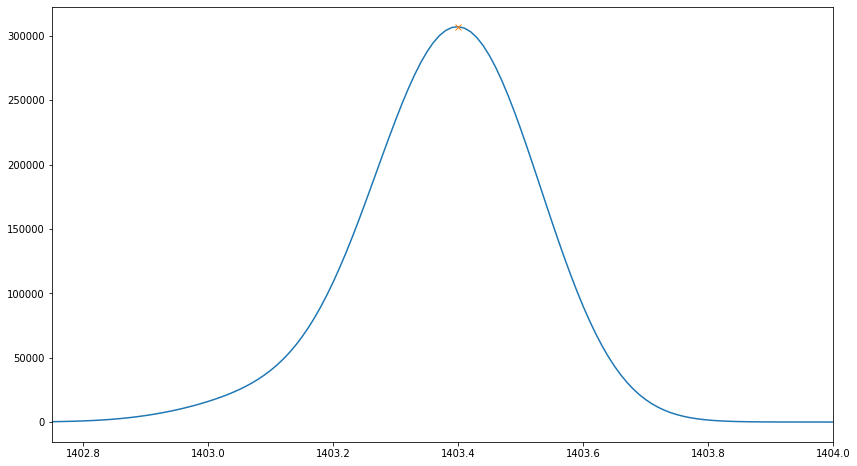

In [16]:
#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec_sm)
ax1.plot(wav[peaks], spec_sm[peaks], "x")
plt.xlim(1402.75,1404)

In [17]:
pos_peaks = wav[peaks]
spec_peaks = spec_sm[peaks]
iis = np.where(spec_peaks>0.05*np.max(spec))
iis = iis[0]

In [18]:
iis

array([0])

In [19]:
amp_peaks = spec_peaks[iis]

In [20]:
pos = pos_peaks[iis]

In [21]:
print('pos =', pos, 'amps = ', amp_peaks)

pos = [1403.4] amps =  [307049.04347826]
